In [6]:
# Load the dataset

# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Supervised_Learning/Classification/heart.csv")

# Display the first few rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### EDA

In [7]:
# Get basic information about the dataset
data.info()

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Summary statistics
data.describe()

# Check the target variable distribution (Assuming 'target' is the column for heart disease)
data['target'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype:

target
1    165
0    138
Name: count, dtype: int64

### Visualise the data


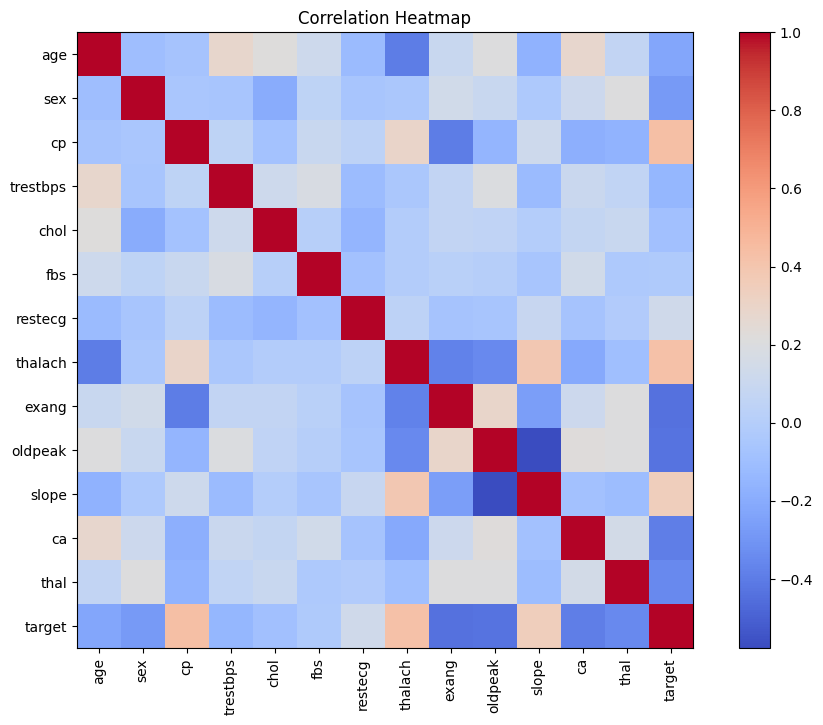

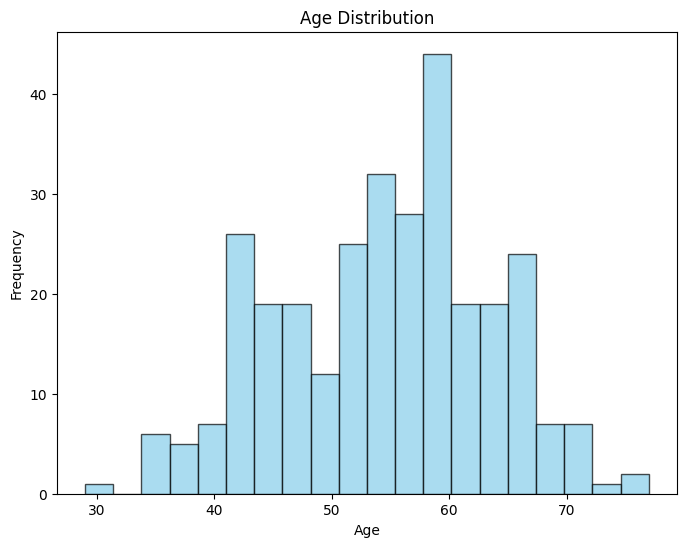

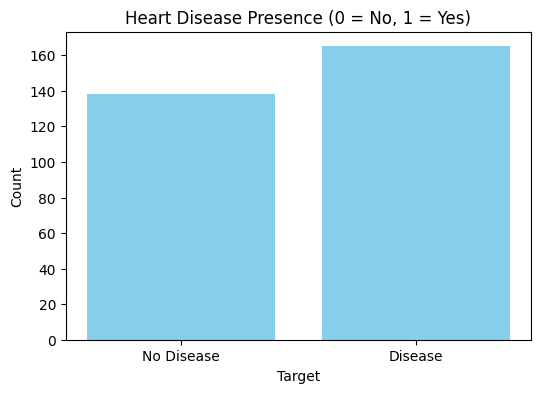

In [17]:
import matplotlib.pyplot as plt
import pandas as pd



# Correlation heatmap (using Matplotlib)
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of age (using Matplotlib)
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Countplot for target variable (using Matplotlib)
plt.figure(figsize=(6, 4))
target_counts = data['target'].value_counts()
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


### preprocess the data


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Build the model


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [20]:
# Train the model on the training data
from sklearn.linear_model import LogisticRegression

# Define the model (or use any model you've trained)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Calculate test accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.8636363636363636
Test Accuracy: 0.8524590163934426


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype:

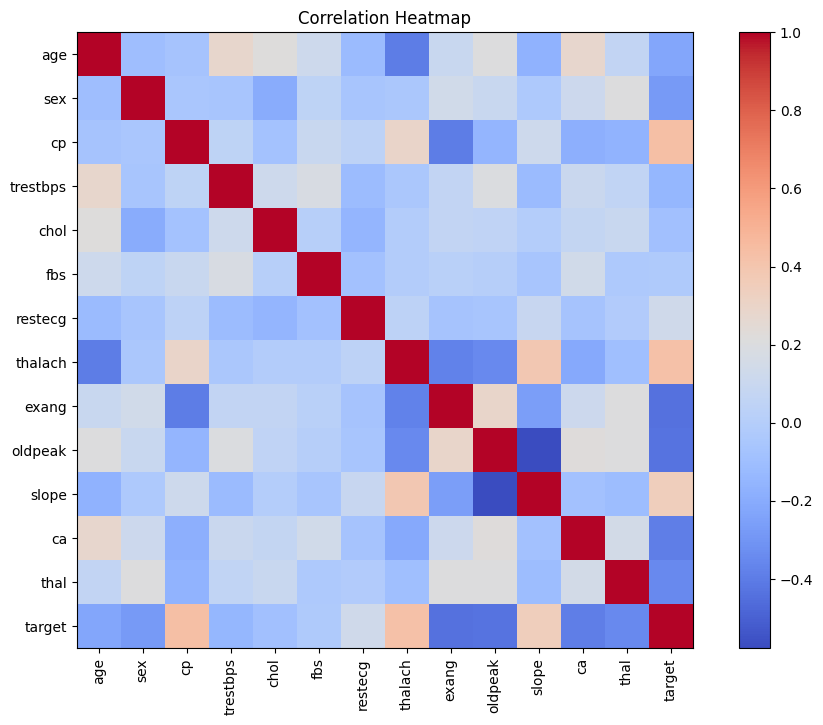

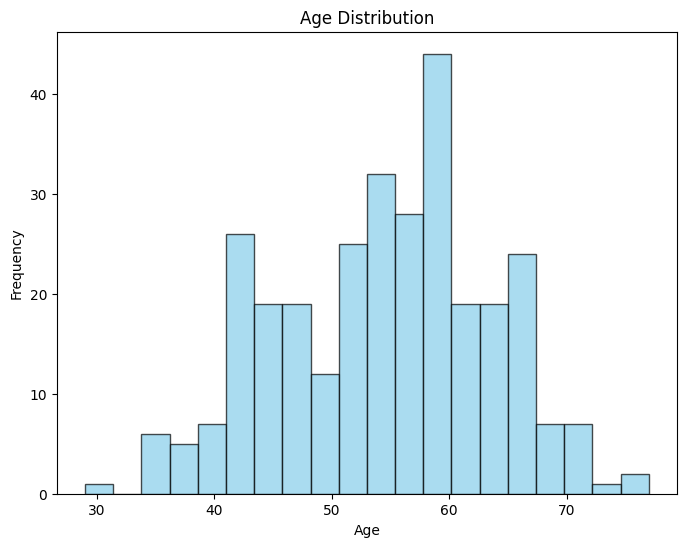

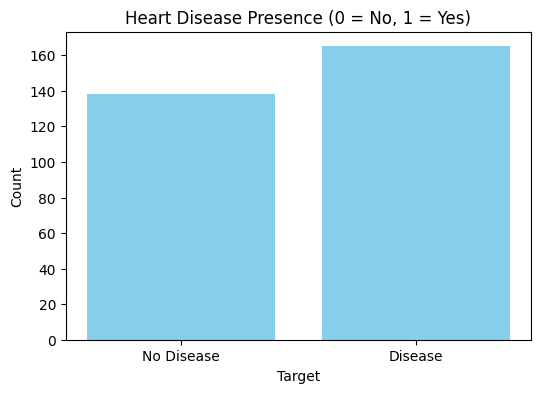

Logistic Regression Model Evaluation:
Logistic Regression Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Random Forest Classifier Model Evaluation:
Random Forest Accuracy: 0.8360655737704918
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


K-Nearest Neighbors Model Evaluation:
KNN Accur

In [22]:
# Load the dataset

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("C:/Supervised_Learning/Classification/heart.csv")

# Display the first few rows
data.head()

# Get basic information about the dataset
data.info()

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Summary statistics
print("Summary Statistics:\n", data.describe())

# Check the target variable distribution (Assuming 'target' is the column for heart disease)
print("Target Variable Distribution:\n", data['target'].value_counts())

# EDA - Visualization
# Correlation heatmap (using Matplotlib)
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of age (using Matplotlib)
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Countplot for target variable (using Matplotlib)
plt.figure(figsize=(6, 4))
target_counts = data['target'].value_counts()
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

# Preprocessing: Split data into features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation

# 1. Logistic Regression
print("Logistic Regression Model Evaluation:")
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))
print("Classification Report:\n", classification_report(y_test, logreg_pred))

# 2. Random Forest Classifier
print("\nRandom Forest Classifier Model Evaluation:")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# 3. K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Model Evaluation:")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

# Comparison of models based on accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("\nModel Comparison (Accuracy):")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
